# Analysis 3 - Algorithm aggregation

We saw in the fast tutorial 1 how to perform algorithm aggregation with the *Fast* method. Let's see now how this method performs in comparison to other methods

In [1]:
import numpy as np
import embedded_voting as ev
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(42)

In [2]:
list_rules = [ev.FastNash(), ev.FastSum(), ev.SumScores(), ev.ProductScores()]
list_names = ["FastNash", "FastSum", "SumScores", "ProductScores"]

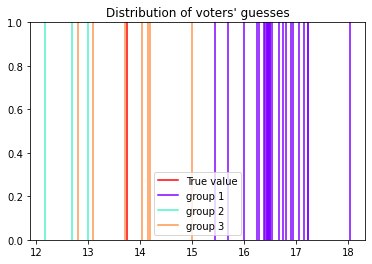

In [3]:
groups_sizes = [25, 3, 7]
features = [[1, 0], [0, 1], [0.2,0.8]]

generator = ev.GroupedMixGenerator(groups_sizes, features)
generator.set_group_noise(8)
generator.set_independent_noise(0.5)
generator.plot_scores()

In [4]:
n_voters = int(np.sum(groups_sizes))
n_candidates = 20

In [10]:
n_iter = 11
n_training = 50
def online_learning(n_iter=20,n_training=50):
    elector = ev.Elector()
    
    tab_training = []
    total_training = np.zeros((n_voters, 0))
    results = np.zeros((n_iter, len(list_rules)))
    
    for i in range(n_iter):

        truth, scores = generator.sample_scores(n_training)
        results_i =[]
        
        # We get the real welfare of each candidate using a SumScoresProfile 
        true_profile = ev.Profile(n_training, 0).add_voter([], truth)
        welfare = ev.SumScores(true_profile).welfare_        
        
        elector(scores, True)
        for j,rule in enumerate(list_rules):
            elector.rule = rule
            w = elector(scores).winner_
            results[i,j] = welfare[w]

        
        tab_training.append(n_training)

        #total_training = np.concatenate([total_training, generator.sample_scores(50)[1]], axis=1)

    return results.T

In [8]:
results = np.zeros((len(list_rules), n_iter))

n_exp = 100
for i in tqdm(range(n_exp)):
    results += online_learning(n_iter=n_iter)

results = results/n_exp

100%|██████████| 100/100 [04:46<00:00,  2.87s/it]


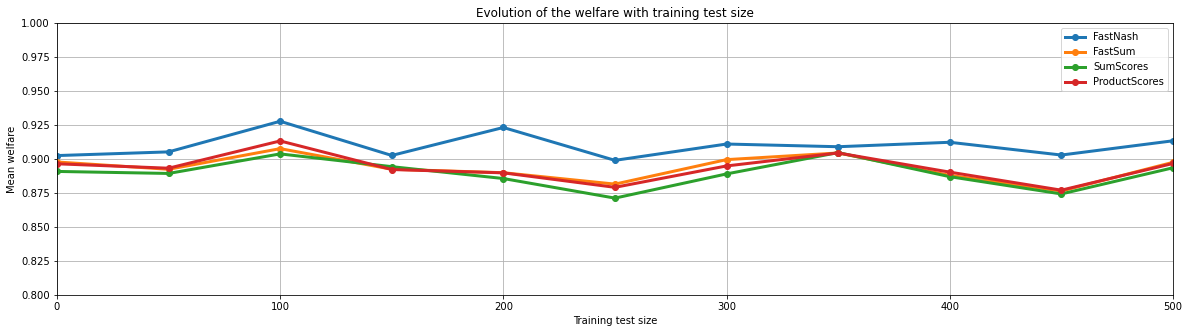

In [11]:
fig = plt.figure(figsize=(20, 5))

for i in range(len(list_rules)):
    plt.plot(np.arange(n_iter)*n_training, results[i], 'o-', label=list_names[i], linewidth=3)
    
plt.ylim(0.8, 1)
plt.xlim(0,(n_iter-1)*n_training)
plt.xlabel("Training test size")
plt.ylabel("Mean welfare")
plt.title("Evolution of the welfare with training test size")
plt.legend()
plt.grid(0.3)
plt.show()